In [1]:
#pip install missingno

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## Loading the data

In [2]:
user_reviews = pd.read_table('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/user_reviews.tsv')
critic = pd.read_table('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/critic.tsv')
items = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/items.csv')
villagers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv')
tier_rank = pd.read_csv("acnh_villager_data.csv")

In [92]:
user_reviews["date"].unique()

array(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
       '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
       '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
       '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
       '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
       '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
       '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02',
       '2020-05-03'], dtype=object)

## Villagers database

In [3]:
villagers

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...
3,6,al,Al,male,gorilla,10-18,lazy,Steep Hill,Ayyeeee,villager-al,https://villagerdb.com/images/villagers/thumb/...
4,7,alfonso,Alfonso,male,alligator,6-9,lazy,Forest Life,it'sa me,villager-alfonso,https://villagerdb.com/images/villagers/thumb/...
...,...,...,...,...,...,...,...,...,...,...,...
386,475,winnie,Winnie,female,horse,1-31,peppy,My Place,hay-OK,villager-winnie,https://villagerdb.com/images/villagers/thumb/...
387,477,wolfgang,Wolfgang,male,wolf,11-25,cranky,K.K. Song,snarrrl,villager-wolfgang,https://villagerdb.com/images/villagers/thumb/...
388,480,yuka,Yuka,female,koala,7-20,snooty,Soulful K.K.,tsk tsk,villager-yuka,https://villagerdb.com/images/villagers/thumb/...
389,481,zell,Zell,male,deer,6-7,smug,K.K. D&B,pronk,villager-zell,https://villagerdb.com/images/villagers/thumb/...


In [4]:
villagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_n        391 non-null    int64 
 1   id           390 non-null    object
 2   name         391 non-null    object
 3   gender       391 non-null    object
 4   species      391 non-null    object
 5   birthday     391 non-null    object
 6   personality  391 non-null    object
 7   song         380 non-null    object
 8   phrase       391 non-null    object
 9   full_id      391 non-null    object
 10  url          391 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.7+ KB


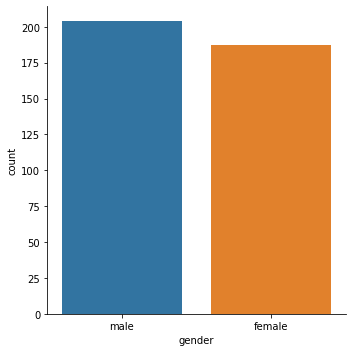

In [38]:
sns.catplot(x="gender", kind="count", data=villagers)

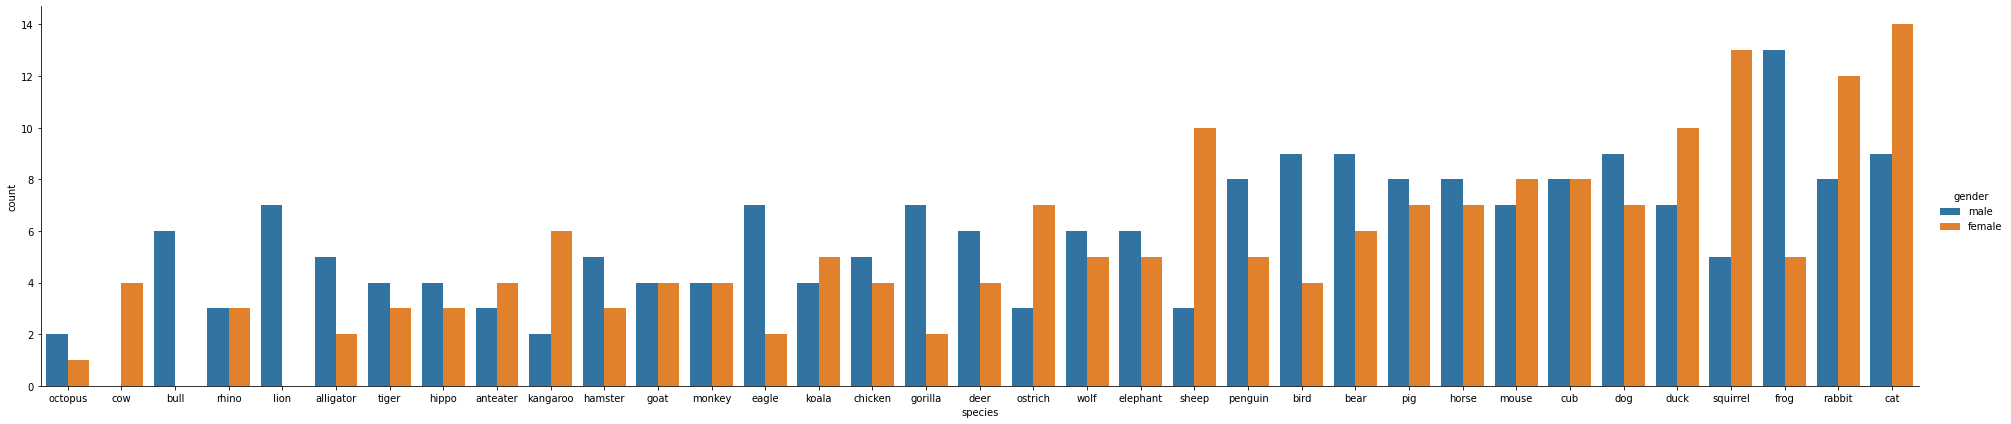

In [39]:
sns.catplot(x="species", kind="count", data=villagers, hue ="gender", order=villagers["species"].value_counts().sort_values().index, height=6, aspect=4.5)

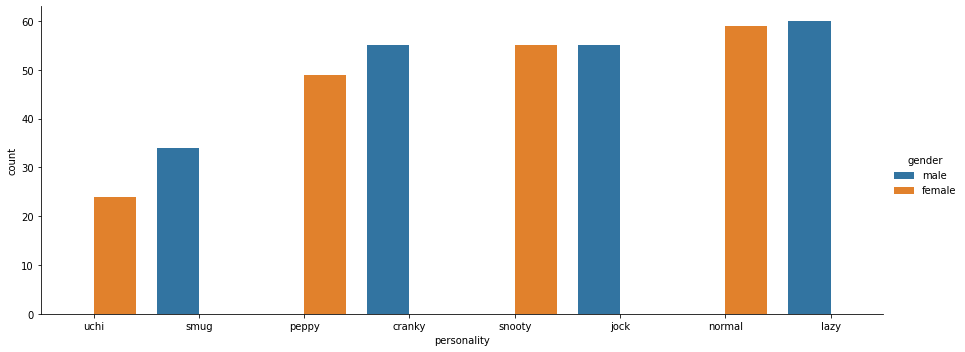

In [40]:
sns.catplot(x="personality", kind="count", hue="gender", order=villagers["personality"].value_counts().sort_values().index ,data=villagers,  aspect=2.5)

## Villagers tier/rank dataset

In [8]:
tier_rank

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha
...,...,...,...
408,6,159,Rocco
409,6,160,Bettina
410,6,161,Boris
411,6,162,Bitty


In [9]:
#How much villagers in tier_rank df are not represented in the villagers df
tier_rank["name"][tier_rank["name"].isin(villagers["name"]) == False].index.value_counts().sum()

27

In [10]:
#We correct some missmatching names
tier_rank['name'] = tier_rank['name'].replace(['OHare'],"O\'Hare")
tier_rank['name'] = tier_rank['name'].replace(['Buck(Brows)'],"Buck")
tier_rank['name'] = tier_rank['name'].replace(['Renee'],"Renée")
tier_rank['name'] = tier_rank['name'].replace(['WartJr'],"Wart Jr.")
tier_rank['name'] = tier_rank['name'].replace(['Crackle(Spork)'],"Spork")

In [11]:
#Assess if all the villagers in the villagers df are included in the tier_rank df
tier_rank["name"][tier_rank["name"].isin(villagers["name"])].index.value_counts().sum() == villagers.shape[0]

True

In [12]:
#We drop villagers that are not in our tier_rank dataframe
tier_rank.drop(tier_rank["name"][tier_rank["name"].isin(villagers["name"]) == False].index)

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
3,1,4,Sherb
6,1,7,Ankha
7,1,8,Zucker
...,...,...,...
408,6,159,Rocco
409,6,160,Bettina
410,6,161,Boris
411,6,162,Bitty


In [13]:
#We join both dataframes
villagers.set_index('name', drop=True, inplace=True)
tier_rank.set_index('name', drop=True, inplace=True)

In [14]:
villagers_tier_rank = villagers.join(tier_rank)

In [15]:
#We can drop unnecessary columns
villagers_tier_rank.drop(columns=['row_n', 'id', 'full_id', 'url'], inplace=True)

In [16]:
villagers_tier_rank.sort_values(["tier","rank"], inplace=True)
villagers_tier_rank["rank"] = np.arange(1,villagers_tier_rank.shape[0]+1)

In [17]:
villagers_tier_rank

,gender,species,birthday,personality,song,phrase,tier,rank
name,,,,,,,,
Raymond,male,cat,10-1,smug,NaN,crisp,1,1
Marshal,male,squirrel,9-29,smug,Space K.K.,sulky,1,2
Sherb,male,goat,1-18,lazy,NaN,bawwww,1,3
Ankha,female,cat,9-22,snooty,Marine Song 2001,me meow,1,4
Zucker,male,octopus,3-8,lazy,Spring Blossoms,bloop,1,5
...,...,...,...,...,...,...,...,...
Rocco,male,hippo,8-18,cranky,K.K. Lament,hippie,6,387
Bettina,female,mouse,6-12,normal,K.K. Swing,eekers,6,388
Boris,male,pig,11-6,cranky,K.K. House,schnort,6,389


## Villagers popularity dataset

### Gender analysis

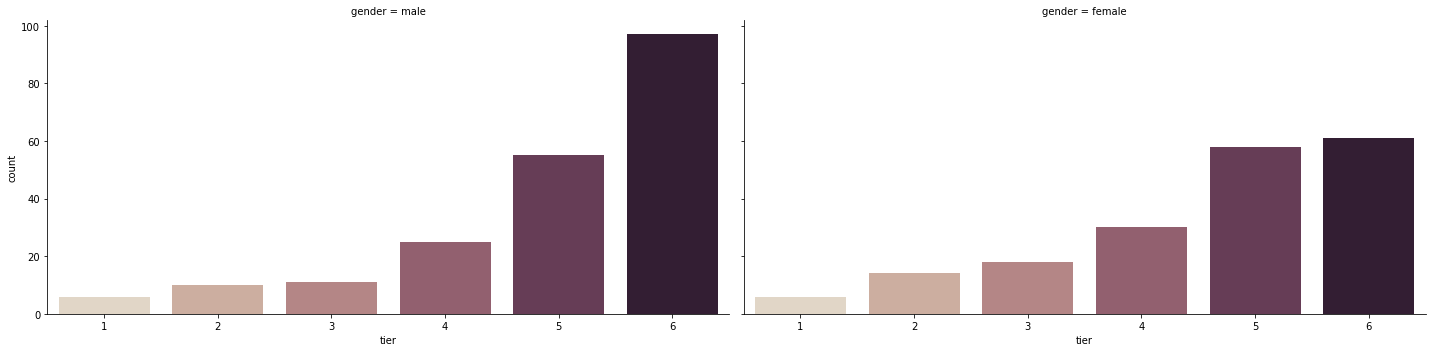

In [18]:
sns.catplot(x="tier", kind="count", palette="ch:.25", data=villagers_tier_rank, height=5, aspect=2, col="gender")

<AxesSubplot:xlabel='gender', ylabel='rank'>

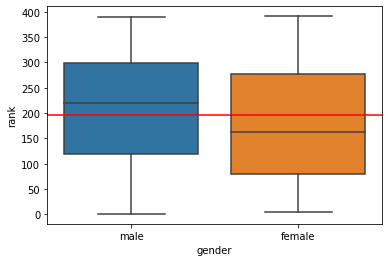

In [19]:
plt.axhline(villagers_tier_rank["rank"].mean(), color='r')
sns.boxplot(x="gender", y="rank", data=villagers_tier_rank)

### Species analysis

In [20]:
#Visualizing the popularity amongst species 
species_rank = villagers_tier_rank.pivot_table(values="rank", index=["species"], 
                                aggfunc={'species': np.count_nonzero,
                                            'rank': np.mean
                                        }).sort_values("rank")
species_rank.columns=["mean_rank","n"]

<AxesSubplot:xlabel='species', ylabel='mean_rank'>

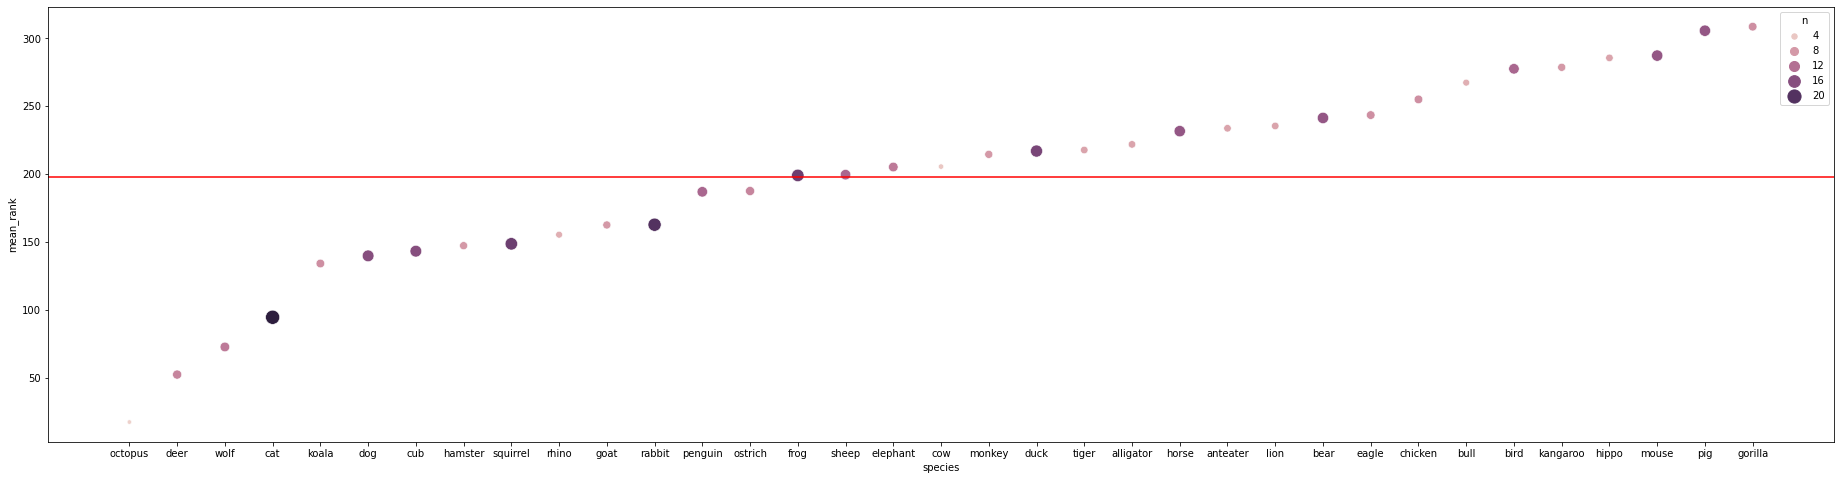

In [21]:
plt.figure(figsize=(32,8))
plt.axhline(species_rank["mean_rank"].mean(), color='r')
sns.scatterplot(x=species_rank.index, y="mean_rank", hue="n", size="n", sizes=(20, 200), data=species_rank)

### Personality analysis

In [22]:
#Constructing a dataframe counting the number of different personalities for each species
df = villagers[["personality","species"]]
species_personality = df.pivot_table(index="species", columns="personality", aggfunc=np.count_nonzero)
species_personality.fillna(0, inplace=True)
species_personality = species_personality.astype("int64")

<AxesSubplot:xlabel='species'>

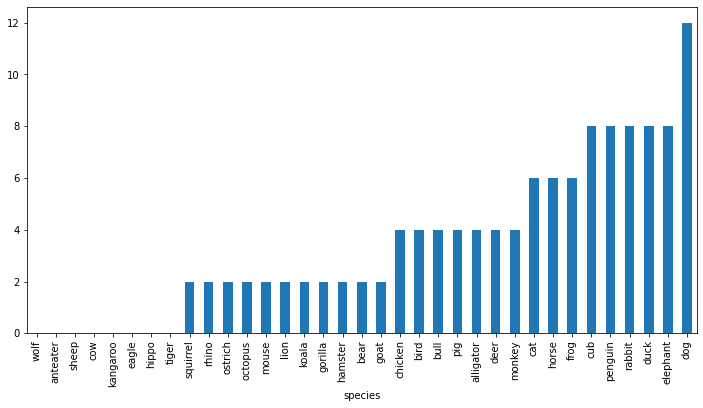

In [23]:
plt.figure(figsize=(12,6))
species_personality["lazy"].sort_values().plot(kind="bar")

In [24]:
species_personality

personality,cranky,jock,lazy,normal,peppy,smug,snooty,uchi
species,,,,,,,,
alligator,2,4,4,2,0,0,2,0
anteater,2,2,0,2,4,2,2,0
bear,10,2,2,2,4,4,0,6
bird,2,8,4,2,4,4,2,0
bull,6,2,4,0,0,0,0,0
cat,4,6,6,6,10,2,10,2
chicken,2,2,4,2,0,2,4,2
cow,0,0,0,2,2,0,4,0
cub,4,4,8,8,4,0,2,2


In [25]:
#Visualizing the relationship between personality and popularity 
personality_rank = villagers_tier_rank.pivot_table(index=["personality"], 
                                aggfunc={'personality': np.count_nonzero,
                                            'rank': np.mean
                                        }).sort_values("rank")
personality_rank.columns=["n","mean_rank"]

In [26]:
personality_rank

,n,mean_rank
personality,,
uchi,24,151.083333
normal,59,151.423729
peppy,49,157.183673
lazy,60,183.833333
smug,34,191.852941
jock,55,223.381818
cranky,55,237.890909
snooty,55,244.563636


<AxesSubplot:xlabel='personality', ylabel='mean_rank'>

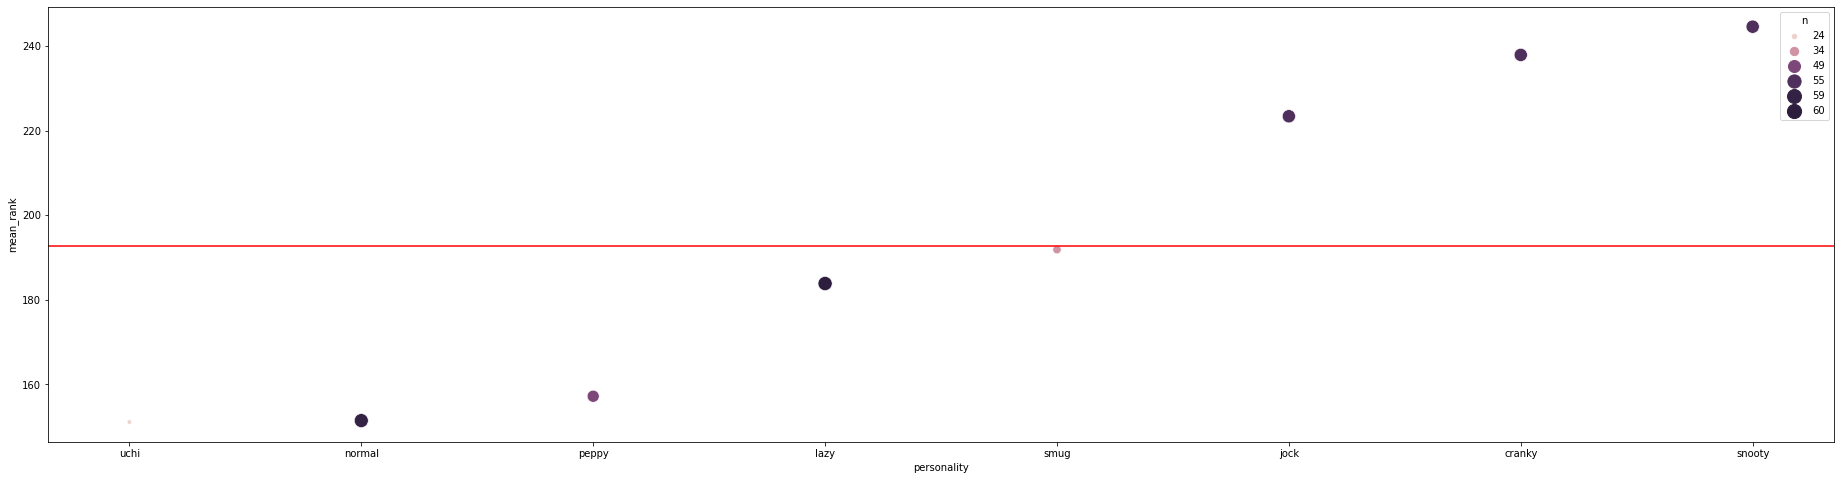

In [27]:
plt.figure(figsize=(32,8))
plt.axhline(personality_rank["mean_rank"].mean(), color='r')
sns.scatterplot(x=personality_rank.index, y="mean_rank", hue="n", size="n", sizes=(20, 200), data=personality_rank)

## Items dataset

In [28]:
items

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-gl...
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee...
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/acade...
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,7425,zigzag-shirt,Zigzag Shirt,Tops,True,240.0,bells,960.0,bells,Nook Shopping,NaN,NaN,NaN,nh,item-zigzag-shirt,https://villagerdb.com/images/items/full/zigza...
4561,7428,zippers-poster,Zipper's Poster,Photos,NaN,250.0,bells,1000.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN
4562,7441,zori,Zori,Shoes,NaN,1075.0,bells,4300.0,bells,NaN,NaN,NaN,NaN,nh,item-zori,https://villagerdb.com/images/items/full/zori....
4563,7442,zuckers-photo,Zucker's Photo,Photos,NaN,10.0,bells,40.0,bells,NaN,NaN,NaN,NaN,nh,NaN,NaN


In [29]:
#Droping useless features
items.drop(columns=["id", "num_id", "id_full","image_url"], inplace=True)

In [89]:
list(items["category"].value_counts().sort_values(ascending=False).index)

['Furniture',
 'Photos',
 'Flooring',
 'Tops',
 'Wallpaper',
 'Dresses',
 'Hats',
 'Bottoms',
 'Accessories',
 'Flowers',
 'Fish',
 'Music',
 'Shoes',
 'Usables',
 'Bugs',
 'Fossils',
 'Tools',
 'Umbrellas',
 'Socks',
 'Fruit',
 'Seashells']

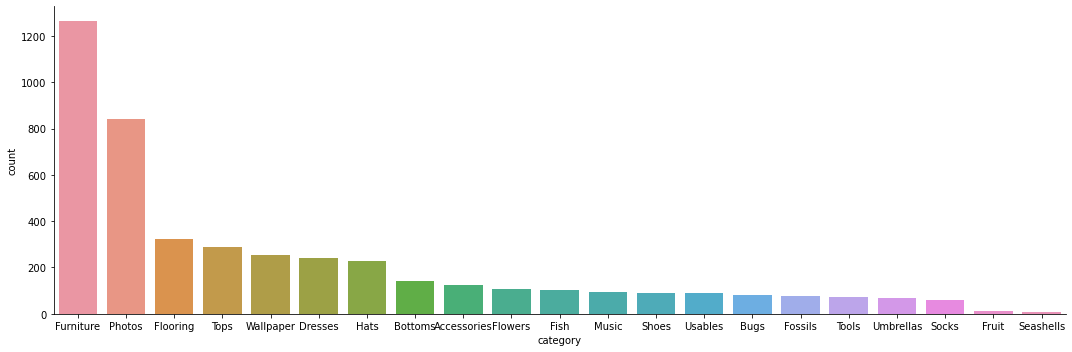

In [90]:
sns.catplot(kind="count", x="category", data=items, order=list(items["category"].value_counts().sort_values(ascending=False).index),
            orient="h", aspect=3.0)

In [31]:
#Check for missing values and some overall info about the data set
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4565 non-null   object 
 1   category       4565 non-null   object 
 2   orderable      1790 non-null   object 
 3   sell_value     4529 non-null   float64
 4   sell_currency  4529 non-null   object 
 5   buy_value      3551 non-null   float64
 6   buy_currency   3551 non-null   object 
 7   sources        902 non-null    object 
 8   customizable   575 non-null    object 
 9   recipe         588 non-null    float64
 10  recipe_id      588 non-null    object 
 11  games_id       4565 non-null   object 
dtypes: float64(3), object(9)
memory usage: 428.1+ KB


In [32]:
#Summary of how many missing values are contained within the dataframe
items.isna().sum()

name                0
category            0
orderable        2775
sell_value         36
sell_currency      36
buy_value        1014
buy_currency     1014
sources          3663
customizable     3990
recipe           3977
recipe_id        3977
games_id            0
dtype: int64

<AxesSubplot:>

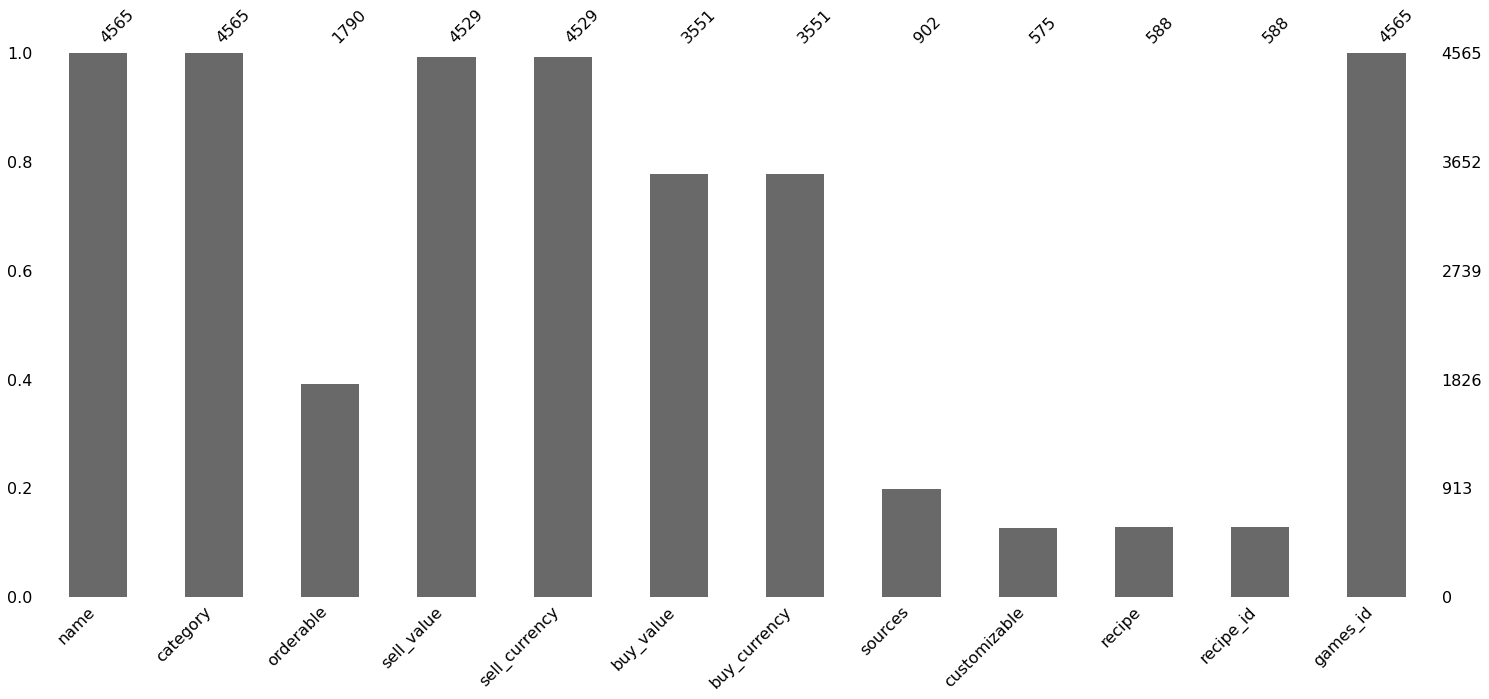

In [33]:
#Visualizing missing values
msno.bar(items)

<AxesSubplot:>

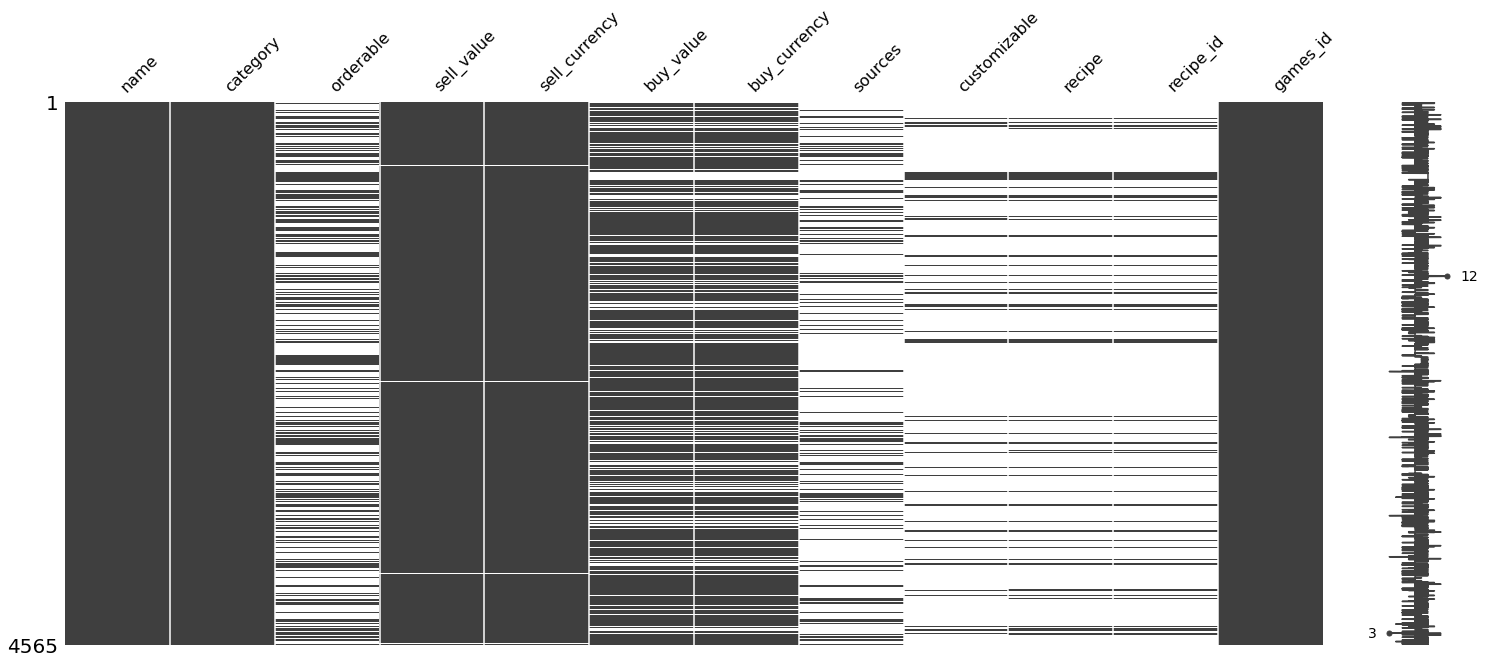

In [34]:
#Visualizing where the missing values are located 
msno.matrix(items)

/Users/ismaiilkad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sell_value', ylabel='Density'>

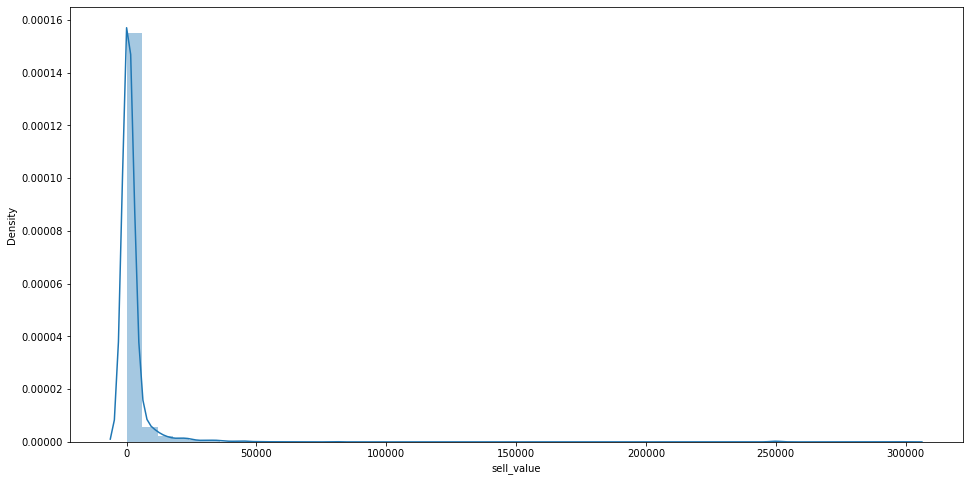

In [35]:
#Trying to vizualise the sell_value distribution, however due to some high sell_values the distribution is hard to determine
plt.figure(figsize=(16,8))
sns.distplot(a=items["sell_value"])

In [47]:
print(np.exp(6))
print(np.exp(7))

403.4287934927351
1096.6331584284585


In [53]:
items["name"][items["sell_value"] == items["sell_value"].min()]

4156    Tree Branch
4157    Tree Branch
Name: name, dtype: object

In [49]:
items["sell_value"].describe()

count      4529.000000
mean       2261.378229
std       11313.225932
min           5.000000
25%         240.000000
50%         390.000000
75%        1000.000000
max      300000.000000
Name: sell_value, dtype: float64

<AxesSubplot:xlabel='sell_value'>

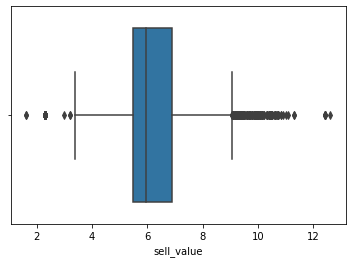

In [45]:
sns.boxplot(x=items["sell_value"]))

/Users/ismaiilkad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sell_value', ylabel='Density'>

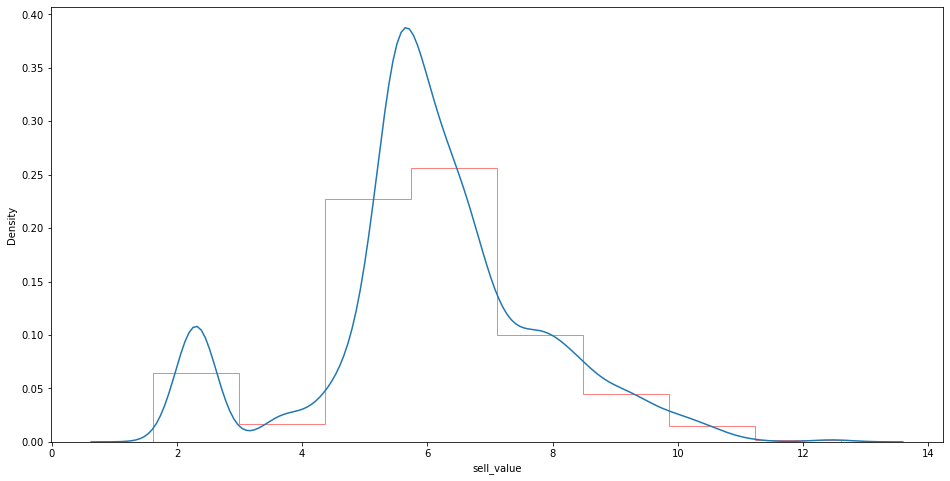

In [36]:
#To overcome the extreme values impact on the distribution vizualization, let's transform our data with the log function
plt.figure(figsize=(16,8))
sns.distplot(a=np.log(items["sell_value"]), bins=8,
            hist_kws={"histtype": "step", "linewidth": 1,
                    "alpha": 0.5, "color": "r"})

<AxesSubplot:xlabel='sell_value', ylabel='buy_value'>

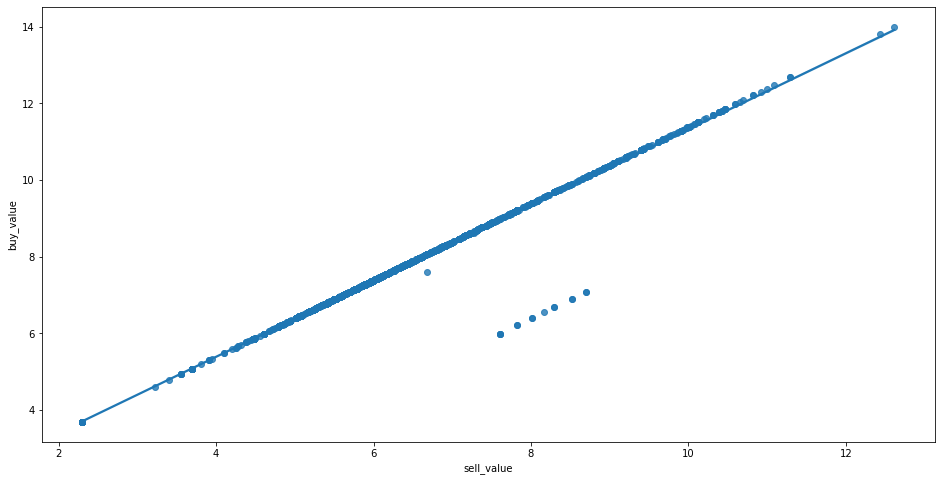

In [37]:
#The relationship between the sell and the buy value is a nearly perfect linear relationship
plt.figure(figsize=(16,8))
sns.regplot(x=np.log(items["sell_value"]), y=np.log(items["buy_value"]))